<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/250px-Jupyter_logo.svg.png" alt="Jupyter_logo" class="img-rounded img-responsive" height="60" width="60" align="left">
<span><br><br><br></span>

<h1 align='center' style='margin-bottom: 0px'>员工离职分析</h1>

## 目的
本文是kaggle中的一个案例-员工离职分析，从数据集中分析员工的离职原因,并发现其中的问题。
数据主要包括影响员工离职的各种因素（工资、绩效、工作满意度、参加项目数、工作时长、是否升职、等）以及员工是否已经离职的对应记录。

## 数据探索

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv("G:/project/hr/HR_comma_sep.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


统计看出，离职率为23.8%

In [5]:
pd.DataFrame(np.vstack((np.array(df['left'].value_counts()),np.array(df['left'].value_counts())/len(df['left']))),index=["counts","rate"]).T

,counts,rate
0,11428.0,0.761917
1,3571.0,0.238083


下图信息可知：
> 离职员工的满意度普遍偏低，平均只有0.4，而在岗员工的满意度为0.7  
> 离职员工工作时间较长，平均月225h  
> 离职员工平均绩效高于在岗员工平均绩效，并高于平均绩效0.71  
> 离职员工普遍工作年限较长，平均为4年

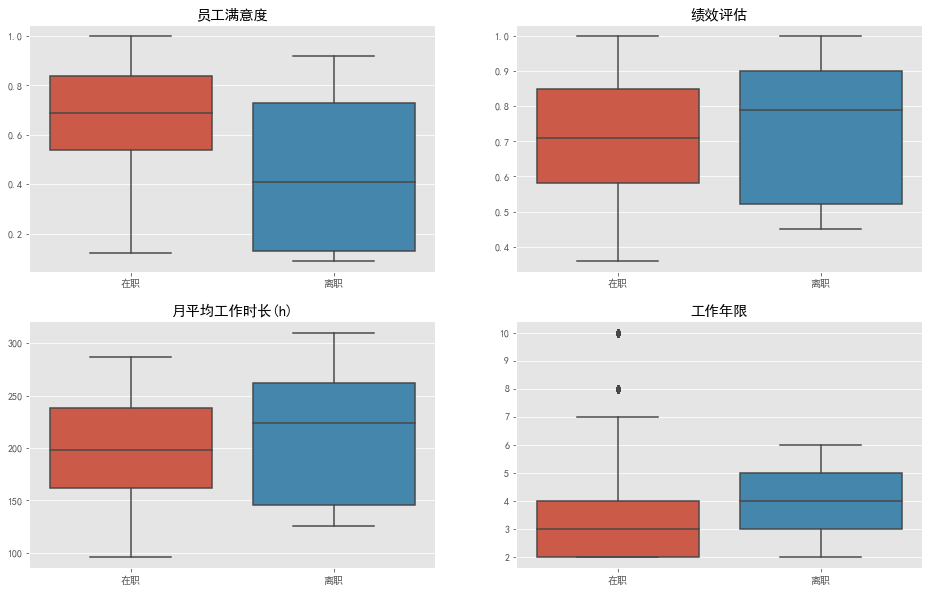

In [6]:
maping = {'satisfaction_level':'员工满意度','last_evaluation':'绩效评估','average_montly_hours':'月平均工作时长(h)','time_spend_company':'工作年限'}
fig,axes = plt.subplots(2,2,figsize=(16,10))
ax = [axes[0,0],axes[0,1],axes[1,0],axes[1,1]]
data = df[['satisfaction_level','last_evaluation','average_montly_hours','time_spend_company','left']]

for i,j in enumerate(data.iloc[:,0:4]):
    sns.boxplot( y=j, x="left",data=data,ax =ax[i])
    ax[i].set_title(maping[j])
    ax[i].set_xticklabels(labels=['在职','离职']);ax[i].set_xlabel("");ax[i].set_ylabel("")

下图信息可知：
> 低工资水平员工离职率最高，超过25%，工资水平越高离职率越低  
> 五年内没有升值的应该离职率超过25%  
> 除了参加2个项目之外，参加项目越多离职率越高，此时员工拥有了经验作为离职的资本

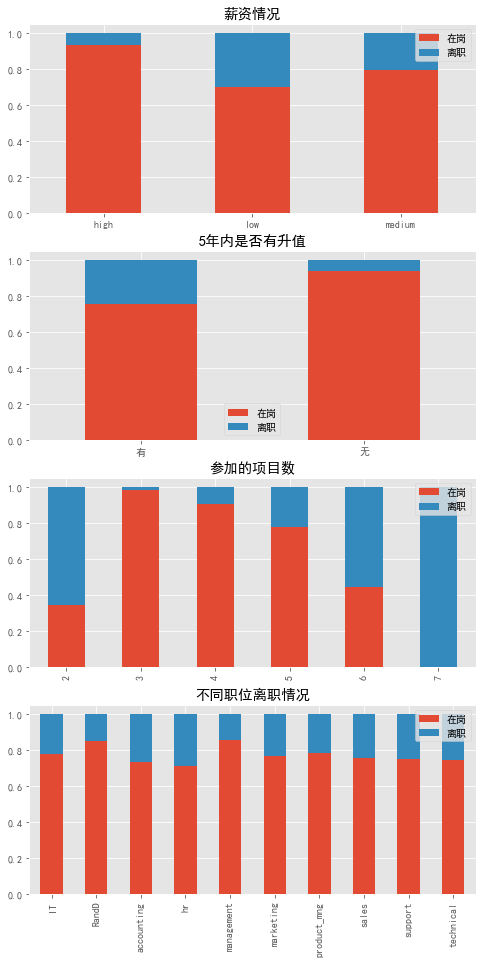

In [7]:
fig,axes = plt.subplots(4,1,figsize=(8,16))#一行两列
pd.crosstab(df.salary,df.left,dropna=False,normalize='index').plot.bar(ax = axes[0],stacked=True)
pd.crosstab(df.promotion_last_5years,df.left,dropna=False,normalize='index').plot.bar(ax = axes[1],stacked=True)
pd.crosstab(df.number_project,df.left,dropna=False,normalize='index').plot.bar(ax = axes[2],stacked=True)
pd.crosstab(df.sales,df.left,dropna=False,normalize='index').plot.bar(ax = axes[3],stacked=True)

#axes[0].set_xticklabels(["NO","YES"],rotation=0)
#plt.xticks(np.arange(len(xaxislabel)), x, rotation=270, fontsize =18)
#axes[0].set_xticks(np.arange(len(x)),x)   #调整x轴顺序
axes[0].set_xticklabels(["high",'low',"medium"],rotation=0)
axes[1].set_xticklabels(["有","无"],rotation=0)
axes[0].legend(['在岗','离职']);axes[1].legend(['在岗','离职']);axes[2].legend(['在岗','离职']);axes[3].legend(['在岗','离职'])
axes[0].set_title('薪资情况');axes[1].set_title('5年内是否有升值');axes[2].set_title('参加的项目数');axes[3].set_title('不同职位离职情况')
axes[0].set_xlabel("");axes[1].set_xlabel("");axes[2].set_xlabel("");axes[3].set_xlabel("")
plt.show()

## 查看缺失值
本数据没有缺失值

In [8]:
def missing_value_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = df.isnull().sum()*100/len(df) #缺失百分比
    mis_val_df = pd.concat([mis_val,mis_val_percent],axis=1)
    mis_val_df.columns=['Missing Values','% of total values']
    nomis_val = mis_val_df[mis_val_df['Missing Values']!=0] #有缺失值的列
    mis_val_df.sort_values(by='% of total values',ascending = False,inplace=True)
    mis_val_table_ren_columns=mis_val_df.round(1)
    #缺失值情况
    print("there is total",df.shape[1],"columns.\n","there are",nomis_val.shape[0],"has missing value.")
    return mis_val_table_ren_columns
    
missing_values = missing_value_table(df)
missing_values.head(20)

there is total 10 columns.
 there are 0 has missing value.


,Missing Values,% of total values
satisfaction_level,0,0.0
last_evaluation,0,0.0
number_project,0,0.0
average_montly_hours,0,0.0
time_spend_company,0,0.0
Work_accident,0,0.0
left,0,0.0
promotion_last_5years,0,0.0
sales,0,0.0
salary,0,0.0


## 模型建立和评估

In [9]:
y = df.left

In [10]:
data = df.drop(['left','sales'],axis=1)
features = data.columns

In [11]:
data['salary'].replace({'low','medium','high'},{1,2,3},inplace=True)

In [12]:
data = data.as_matrix().astype(np.float)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(data)
x_std = scaler.transform(data)

SVM分类: 0.955732 (0.007966)
随机森林: 0.992388 (0.007128)
KNN: 0.943827 (0.016574)
逻辑回归: 0.677487 (0.041451)


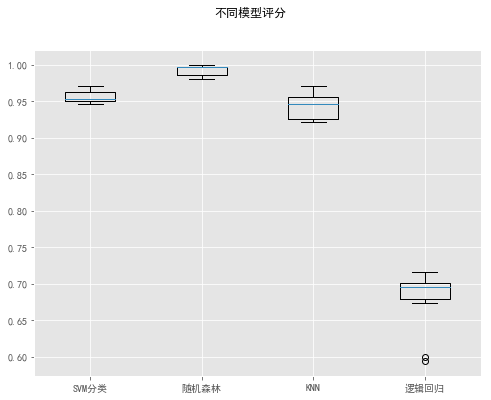

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import roc_curve, auc


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR

models = {'SVM分类':SVC,'随机森林':RF,'KNN':KNN,'逻辑回归':LR}

results = []
names = []
for name, model in models.items():
    sfolder = StratifiedKFold(n_splits=10,random_state=0,shuffle=False)
    clf = model()
    scores = cross_val_score(clf, x_std, y, scoring='precision_macro', cv =sfolder)
    names.append(name)
    results.append(scores)
    msg = "%s: %f (%f)" % (name, scores.mean(), scores.std())
    print(msg)
    
    
fig = plt.figure(figsize=(8,6))
fig.suptitle('不同模型评分')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 混淆矩阵
随机森林表现最优

SVM分类 :
[[3706  103]
 [ 108 1082]]
随机森林 :
[[3777   32]
 [  17 1173]]
KNN :
[[3674  135]
 [  97 1093]]
逻辑回归 :
[[3017  792]
 [ 802  388]]


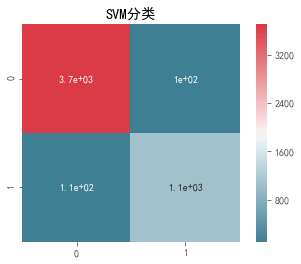

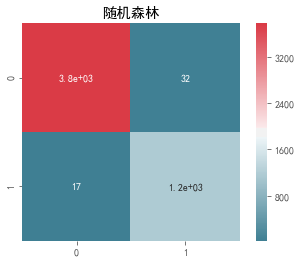

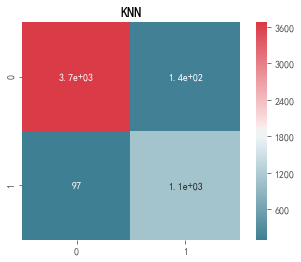

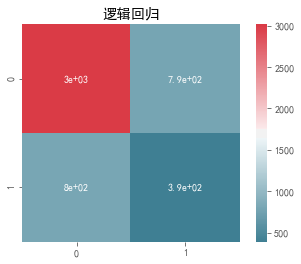

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
sfolder = StratifiedKFold(n_splits=3,random_state=0,shuffle=False)


for name, model in models.items():
    clf = model()
    for train_index, test_index in sfolder.split(x_std,y):
        x_train, x_test = x_std[train_index], x_std[test_index]
        y_train = y[train_index]
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
    matrix = confusion_matrix(y[test_index],y_pred,labels =[0,1])
    print(name,':')
    print(matrix)
    fig = plt.figure()
    plt.title(name)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(matrix,cmap = cmap,square = True,annot=True)  

### ROC曲线绘制

In [15]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

def plot_roc(x, y, clf_class, **kwargs):
    plt.figure(figsize = (10,8))
    sfolder = StratifiedKFold(n_splits=3,random_state=0,shuffle=False)
    tprs = []
    aucs = []
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    i = 0
    for train_index, test_index in sfolder.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
        # 绘制ROC曲线
        fpr, tpr, thresholds = roc_curve(y[test_index], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))#线性插值函数
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)   # 计算曲线下面积
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.8,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        #plt.legend(loc="lower right")
        i += 1
    #均值
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)
    #区间
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
    #二分类线0.5
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

SVC ROC曲线 


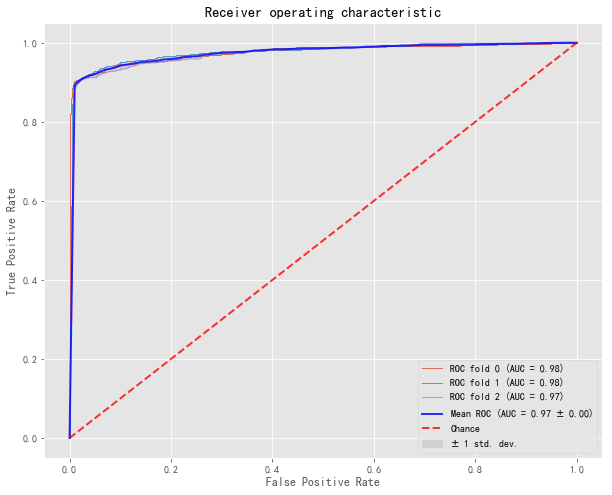

KNN ROC曲线 


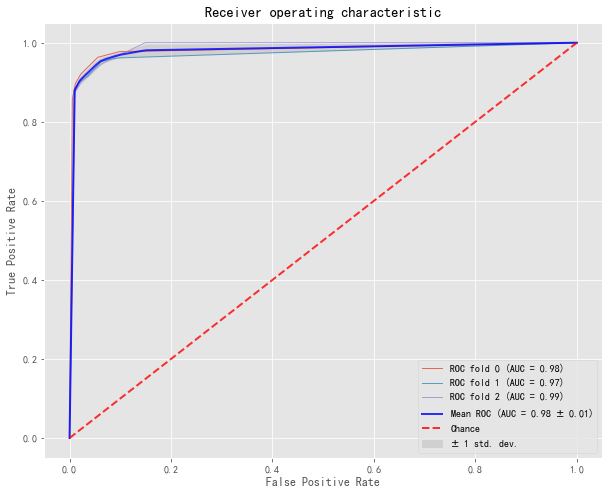

RF ROC曲线 


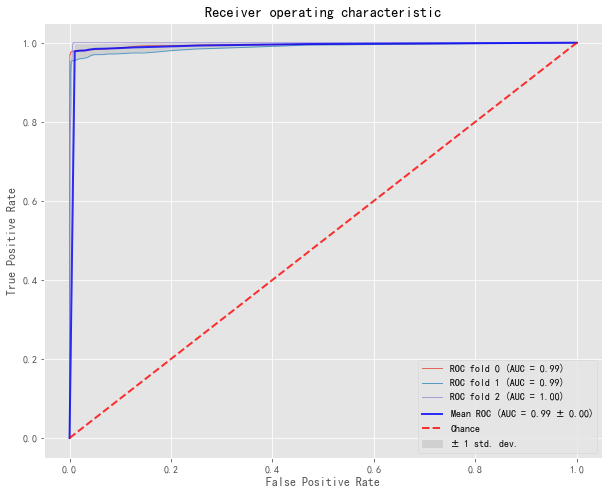

LR ROC曲线 


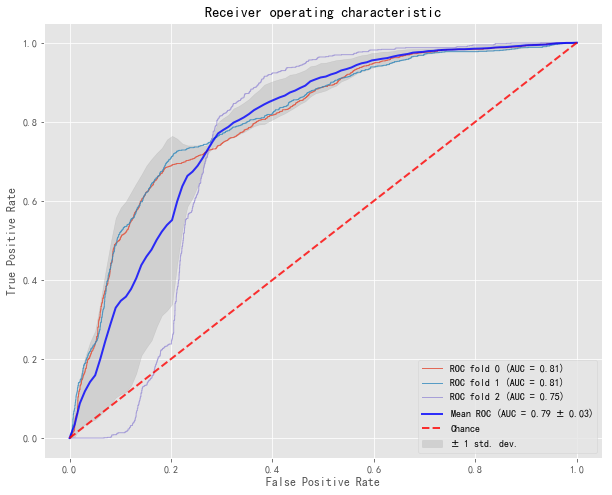

In [16]:
print("SVC ROC曲线 ")
plot_roc(x_std,y,SVC,probability=True)
print("KNN ROC曲线 ")
plot_roc(x_std,y,KNN)
print("RF ROC曲线 ")
plot_roc(x_std,y,RF,n_estimators=100)
print("LR ROC曲线 ")
plot_roc(x_std,y,LR)

### 选用随机森林作为分析模型，网格搜索选定最佳参数

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = parameters = {'n_estimators':[10,50,100],
                            'max_depth':[10,11,12,15],
                            'min_samples_split':[2,5,10]}
rfc = RF(n_estimators=50,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(x_std,y)
print(GS.best_params_)

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 50}


### 输出各特征重要程度：
员工满意度，绩效评估，完成的项目数量，每月工作时长与离职相关性最大

In [18]:
rfc = RF(n_estimators=100,min_samples_split = 5,max_depth=15)
rfc = rfc.fit(x_std,y)
importances = rfc.feature_importances_[:10]
indices = np.argsort(importances)[::-1]
for f in range(8):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

1. satisfaction_level (0.334501)
2. last_evaluation (0.192136)
3. number_project (0.185761)
4. average_montly_hours (0.152047)
5. time_spend_company (0.116770)
6. Work_accident (0.008640)
7. promotion_last_5years (0.008504)
8. salary (0.001640)
